In [1]:
import warnings
warnings.filterwarnings('ignore')

# Linear Algebra and Plots

import pandas                        as pd
import numpy                         as np
import seaborn                       as sns
import matplotlib.pyplot             as plt
%matplotlib inline

from sklearn.preprocessing           import normalize, StandardScaler, MinMaxScaler, label, binarize
from sklearn.model_selection         import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_val_score
from sklearn.metrics                 import *

# ML Libraries

from sklearn.base                    import BaseEstimator
from sklearn.ensemble                import RandomForestClassifier
from sklearn.decomposition           import PCA
from xgboost                         import XGBClassifier
from sklearn.linear_model            import LogisticRegression, SGDClassifier
from lightgbm                        import LGBMClassifier
from sklearn.tree                    import DecisionTreeClassifier
from sklearn.neighbors               import KNeighborsClassifier
from sklearn.svm                     import SVC
from sklearn.naive_bayes             import MultinomialNB

# Pipeline

from sklearn.pipeline                import make_pipeline

# Datasets

from sklearn                         import datasets

In [2]:
breast_cancer = datasets.load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

In [3]:
df_X  = pd.DataFrame(X)
df_y = pd.DataFrame(y)
print(df_X.head())
print(df_y.head())

      0      1       2       3        4        5       6        7       8   \
0  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001  0.14710  0.2419   
1  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869  0.07017  0.1812   
2  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974  0.12790  0.2069   
3  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414  0.10520  0.2597   
4  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980  0.10430  0.1809   

        9   ...     20     21      22      23      24      25      26      27  \
0  0.07871  ...  25.38  17.33  184.60  2019.0  0.1622  0.6656  0.7119  0.2654   
1  0.05667  ...  24.99  23.41  158.80  1956.0  0.1238  0.1866  0.2416  0.1860   
2  0.05999  ...  23.57  25.53  152.50  1709.0  0.1444  0.4245  0.4504  0.2430   
3  0.09744  ...  14.91  26.50   98.87   567.7  0.2098  0.8663  0.6869  0.2575   
4  0.05883  ...  22.54  16.67  152.20  1575.0  0.1374  0.2050  0.4000  0.1625   

       28       29  
0  0.4601  0.11890  
1 

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.20, random_state=7, shuffle=True, stratify=df_y)

In [5]:
print(X_train)
print()
print(X_test)
print()
print(y_train)
print()
print(y_test)

        0      1       2       3        4        5        6         7   \
285  12.58  18.40   79.83   489.0  0.08393  0.04216  0.00186  0.002924   
535  20.55  20.86  137.80  1308.0  0.10460  0.17390  0.20850  0.132200   
521  24.63  21.60  165.50  1841.0  0.10300  0.21060  0.23100  0.147100   
339  23.51  24.27  155.10  1747.0  0.10690  0.12830  0.23080  0.141000   
429  12.72  17.67   80.98   501.3  0.07896  0.04522  0.01402  0.018350   
..     ...    ...     ...     ...      ...      ...      ...       ...   
508  16.30  15.70  104.70   819.8  0.09427  0.06712  0.05526  0.045630   
203  13.81  23.75   91.56   597.8  0.13230  0.17680  0.15580  0.091760   
297  11.76  18.14   75.00   431.1  0.09968  0.05914  0.02685  0.035150   
390  10.26  12.22   65.75   321.6  0.09996  0.07542  0.01923  0.019680   
125  13.85  17.21   88.44   588.7  0.08785  0.06136  0.01420  0.011410   

         8        9   ...     20     21      22      23      24       25  \
285  0.1697  0.05855  ...  13.50  2

In [6]:
class clf_switcher(BaseEstimator):
    def __init__(self, estimator=SVC()):
        """
        A Custom BaseEstimator that can switch between classifiers.
        Default Support Vector Machine Classifier
        :param estimator: <sklearn classifier object>
        """
        self.estimator = estimator


    def fit(self, X, y=None, **kwargs):
        self.estimator.fit(X, y)
        return self


    def predict(self, X, y=None):
        return self.estimator.predict(X)


    def predict_proba(self, X):
        return self.estimator.predict_proba(X)


    def score(self, X, y):
        return self.estimator.score(X, y)

In [7]:
# it takes a list of tuples as parameter. The last entry is the call to the modelling algorithm
pipeline = make_pipeline(MinMaxScaler(), PCA(), clf_switcher()) 

In [8]:
print("Pipeline steps:\n {}".format(pipeline.steps))

Pipeline steps:
 [('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)), ('clf_switcher', clf_switcher(estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False)))]


In [9]:
hyper_parameter_space = [
    {
        'clf_switcher__estimator': [SGDClassifier(random_state=7)], 
        'clf_switcher__estimator__penalty': ('l2', 'elasticnet', 'l1'),
        'clf_switcher__estimator__max_iter': [50, 80],
        'clf_switcher__estimator__tol': [1e-4],
        'clf_switcher__estimator__loss': ['hinge', 'log', 'modified_huber'],
    },
    {
        'clf_switcher__estimator': [MultinomialNB()],
        'clf_switcher__estimator__alpha': (1e-2, 1e-3, 1e-1),
    },
    {
        'clf_switcher__estimator': [SVC(random_state=7, probability=True)], # SVM if hinge loss
        'clf_switcher__estimator__kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
        'clf_switcher__estimator__C': (0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1),
        'clf_switcher__estimator__degree': (1, 2, 3, 4, 5),
        'clf_switcher__estimator__max_iter': [50, 80]
    },
    {
        'clf_switcher__estimator': [LGBMClassifier(random_state=7)],
    },
    {
        'clf_switcher__estimator': [LogisticRegression(random_state=7)], # Logreg if log loss
    },
    {
        'clf_switcher__estimator': [XGBClassifier(random_state=7)],
    },
    {
        'clf_switcher__estimator': [RandomForestClassifier(random_state=7)],
        'clf_switcher__estimator__criterion': ['entropy', 'gini'],
        'clf_switcher__estimator__max_depth': (1, 2, 3, 4, 5),
    },
    {
        'clf_switcher__estimator': [DecisionTreeClassifier(random_state=7)],
        'clf_switcher__estimator__criterion': ['entropy', 'gini'],
        'clf_switcher__estimator__splitter': ['best', 'random'],
        'clf_switcher__estimator__max_depth': (1, 2, 3, 4, 5),
    },
    {
        'clf_switcher__estimator': [KNeighborsClassifier()],
        'clf_switcher__estimator__algorithm': ['ball_tree', 'kd_tree', 'brute'],
        'clf_switcher__estimator__weights': ['uniform', 'distance'],
        'clf_switcher__estimator__n_neighbors': (1, 3, 5, 10),
        'clf_switcher__estimator__leaf_size': (10, 20, 30, 40, 50),
    },
]

gscv = GridSearchCV(pipeline, hyper_parameter_space, cv=10, n_jobs=12)
gscv.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('minmaxscaler',
                                        MinMaxScaler(copy=True,
                                                     feature_range=(0, 1))),
                                       ('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('clf_switcher',
                                        clf_switcher(estimator=SVC(C=1.0,
                                                                   break_ties=False,
                                                                   cache_size=200,
                                        

In [10]:
gscv.best_score_

0.9802415458937197

In [11]:
gscv.best_params_

{'clf_switcher__estimator': SVC(C=0.4, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=1, gamma='scale', kernel='rbf',
     max_iter=80, probability=True, random_state=7, shrinking=True, tol=0.001,
     verbose=False),
 'clf_switcher__estimator__C': 0.4,
 'clf_switcher__estimator__degree': 1,
 'clf_switcher__estimator__kernel': 'rbf',
 'clf_switcher__estimator__max_iter': 80}

In [12]:
print("Test score: {:.2f}".format(gscv.score(X_test, y_test)))

Test score: 0.95


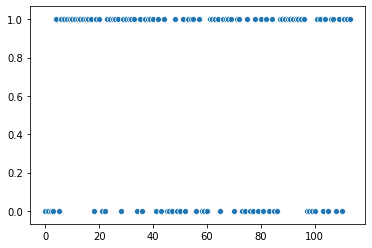

In [13]:
y_pred = gscv.predict(X_test)
sns.scatterplot(data=y_pred)

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        42
           1       0.96      0.96      0.96        72

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [15]:
print("Best cross-validation accuracy: {:.2f}".format(gscv.best_score_)) 
print("Test set accuracy: {:.2f}".format(gscv.score(X_test, y_test)))

Best cross-validation accuracy: 0.98
Test set accuracy: 0.95


In [16]:
def evaluate_threshold(fpr, tpr, thresholds, threshold):
    """
    define a function that accepts a threshold and prints sensitivity and specificity
    """
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])


def roc_plot(fpr, tpr):
    """
    Predefined ROC Plot Function
    """
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
            lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    return (plt.show())

In [17]:
models = []
models.append(RandomForestClassifier(criterion="entropy", random_state=7))
models.append(RandomForestClassifier(criterion="gini", random_state=7))
models.append(XGBClassifier())
models.append(LGBMClassifier())
models.append(DecisionTreeClassifier(criterion="entropy", random_state=7))
models.append(DecisionTreeClassifier(criterion="gini", random_state=7))
models.append(LogisticRegression(random_state=7))
models.append(KNeighborsClassifier(n_neighbors=10))
models.append(SVC(random_state=7))

In [18]:
# Checking with Multiple accuracy metrics and check for Overfitting
def all_models():
    model_list = pd.DataFrame(columns=("Model", "Accuracy", "F1Score", "AUC"))
    rownumber = 0
    #for model in gscv.cv_results_['param_clf_switcher__estimator'][:5]:
    for model in models:
        name = str(model)
        print(name)
        model_list.loc[rownumber, "Model"] = name
        classifier = model
        classifier.fit(X_train, y_train)
        # prediction
        kfold = KFold(n_splits=10, random_state=7)
        results = cross_val_score(model, X_train, y_train, cv=kfold)
        print(results)
        print("Accuracy: %.3f%% (%.3f%%)" % (results.mean() * 100.0, results.std() * 100.0))
        Y_test_predict = classifier.predict(X_test)
        fpr, tpr, thresholds = roc_curve(y_test, Y_test_predict, pos_label=None)
        threshold = 0.5
        print(fpr)
        print(tpr)
        print(thresholds)
        evaluate_threshold(fpr, tpr, thresholds, threshold)
        roc_plot(fpr, tpr)
        model_list.loc[rownumber, "Mean_Accuracy"] = round(results.mean() * 100.0, 2)
        model_list.loc[rownumber, "Mean_Accuracy_Std"] = round(results.std() * 100.0, 2)
        model_list.loc[rownumber, "Accuracy"] = round(((accuracy_score(y_test ,Y_test_predict)) * 100))
        model_list.loc[rownumber, "F1Score"]= round((f1_score(y_test, Y_test_predict)), 2)
        model_list.loc[rownumber, "AUC"] = round((roc_auc_score(y_test, Y_test_predict)), 2)
        Y_train_predict = classifier.predict(X_train)
        model_list.loc[rownumber, "Accuracy_Train"] = round(((accuracy_score(y_train, Y_train_predict)) * 100))
        model_list.loc[rownumber, "F1Score_Train"] = round((f1_score(y_train, Y_train_predict)), 2)
        model_list.loc[rownumber, "AUC_Train"] = round((roc_auc_score(y_train, Y_train_predict)), 2)
        rownumber += 1
    return (model_list.sort_values(by="Mean_Accuracy", ascending=False))

**Sensitivity:** When the actual value is positive, how often is the prediction correct?

- How "sensitive" is the classifier to detecting positive instances?
- Also known as "True Positive Rate" or "Recall"

**Specificity:** When the actual value is negative, how often is the prediction correct?

- How "specific" (or "selective") is the classifier in predicting positive instances?

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)
[0.97826087 1.         0.97826087 0.91304348 1.         0.97777778
 0.95555556 0.97777778 0.97777778 0.95555556]
Accuracy: 97.140% (2.400%)
[0.         0.04761905 1.        ]
[0.         0.97222222 1.        ]
[2 1 0]
Sensitivity: 0.9722222222222222
Specificity: 0.9523809523809523


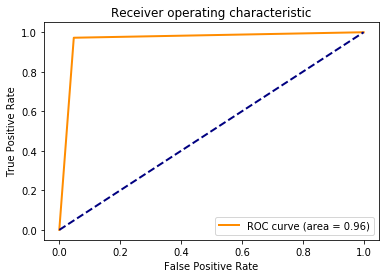

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)
[0.95652174 1.         0.97826087 0.89130435 1.         0.93333333
 0.93333333 0.97777778 0.97777778 0.95555556]
Accuracy: 96.039% (3.215%)
[0.         0.02380952 1.        ]
[0.         0.94444444 1.        ]
[2 1 0]
Sensitivity: 0.9444444444444444
Specificity: 0.9761904761904762


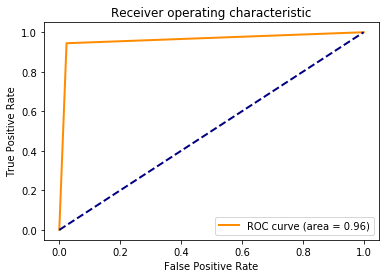

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
[0.97826087 1.         0.97826087 0.89130435 1.         0.95555556
 0.97777778 0.97777778 0.97777778 0.95555556]
Accuracy: 96.923% (2.953%)
[0.         0.02380952 1.        ]
[0.         0.94444444 1.        ]
[2 1 0]
Sensitivity: 0.9444444444444444
Specificity: 0.9761904761904762


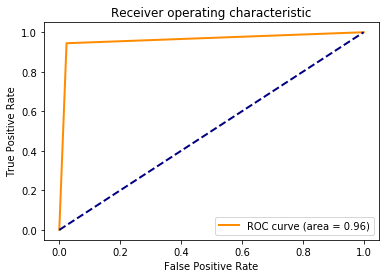

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
[0.95652174 1.         0.97826087 0.93478261 0.97826087 1.
 0.93333333 0.97777778 0.97777778 0.97777778]
Accuracy: 97.145% (2.205%)
[0.         0.04761905 1.        ]
[0.         0.94444444 1.        ]
[2 1 0]
Sensitivity: 0.9444444444444444
Specificity: 0.9523809523809523


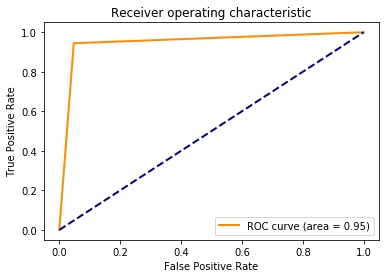

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=7, splitter='best')
[0.97826087 0.97826087 0.93478261 0.84782609 0.97826087 0.95555556
 0.95555556 0.95555556 0.84444444 0.97777778]
Accuracy: 94.063% (4.919%)
[0.         0.07142857 1.        ]
[0.         0.95833333 1.        ]
[2 1 0]
Sensitivity: 0.9583333333333334
Specificity: 0.9285714285714286


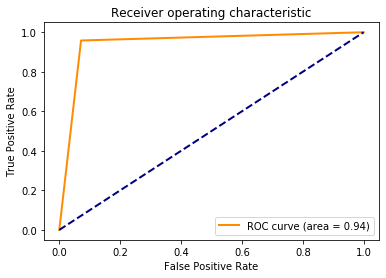

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=7, splitter='best')
[0.95652174 0.93478261 0.91304348 0.86956522 1.         0.88888889
 0.93333333 0.88888889 0.88888889 0.95555556]
Accuracy: 92.295% (3.848%)
[0.         0.02380952 1.        ]
[0.         0.97222222 1.        ]
[2 1 0]
Sensitivity: 0.9722222222222222
Specificity: 0.9761904761904762


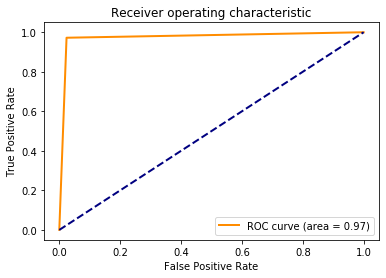

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=7, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
[0.93478261 0.95652174 0.97826087 0.91304348 0.93478261 0.95555556
 0.95555556 0.93333333 0.91111111 0.95555556]
Accuracy: 94.285% (2.010%)
[0.         0.04761905 1.        ]
[0.         0.94444444 1.        ]
[2 1 0]
Sensitivity: 0.9444444444444444
Specificity: 0.9523809523809523


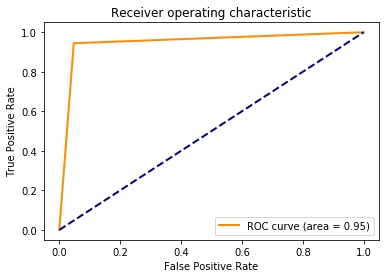

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')
[0.93478261 0.91304348 0.93478261 0.93478261 0.93478261 0.93333333
 0.95555556 0.93333333 0.95555556 0.93333333]
Accuracy: 93.633% (1.148%)
[0.         0.04761905 1.        ]
[0.         0.95833333 1.        ]
[2 1 0]
Sensitivity: 0.9583333333333334
Specificity: 0.9523809523809523


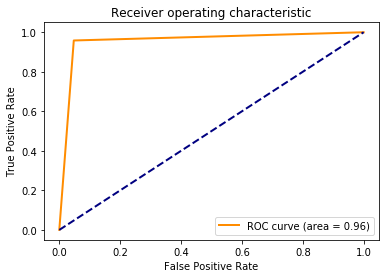

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=7, shrinking=True, tol=0.001,
    verbose=False)
[0.89130435 0.89130435 0.86956522 0.91304348 0.91304348 0.88888889
 0.88888889 0.93333333 0.97777778 0.91111111]
Accuracy: 90.783% (2.887%)
[0.        0.0952381 1.       ]
[0.         0.97222222 1.        ]
[2 1 0]
Sensitivity: 0.9722222222222222
Specificity: 0.9047619047619048


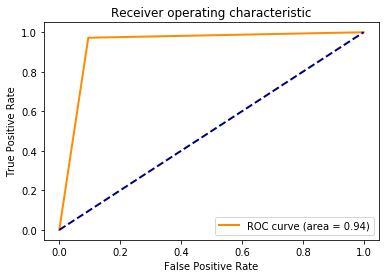

                                               Model  Accuracy F1Score   AUC  \
0  RandomForestClassifier(bootstrap=True, ccp_alp...      96.0    0.97  0.96   
3  LGBMClassifier(boosting_type='gbdt', class_wei...      95.0    0.96  0.95   
2  XGBClassifier(base_score=0.5, booster='gbtree'...      96.0    0.96  0.96   
1  RandomForestClassifier(bootstrap=True, ccp_alp...      96.0    0.96  0.96   
6  LogisticRegression(C=1.0, class_weight=None, d...      95.0    0.96  0.95   
4  DecisionTreeClassifier(ccp_alpha=0.0, class_we...      95.0    0.96  0.94   
7  KNeighborsClassifier(algorithm='auto', leaf_si...      96.0    0.97  0.96   
5  DecisionTreeClassifier(ccp_alpha=0.0, class_we...      97.0    0.98  0.97   
8  SVC(C=1.0, break_ties=False, cache_size=200, c...      95.0    0.96  0.94   

   Mean_Accuracy  Mean_Accuracy_Std  Accuracy_Train  F1Score_Train  AUC_Train  
0          97.14               2.40           100.0           1.00       1.00  
3          97.14               2.21    

In [19]:
# Check for any overfitting
print(all_models())

In [20]:
gscv.cv_results_

{'mean_fit_time': array([0.01809974, 0.01161897, 0.01039994, 0.00798869, 0.00932019,
        0.00661542, 0.00549986, 0.00859993, 0.00859969, 0.00729966,
        0.00859983, 0.00959852, 0.00549698, 0.00939786, 0.0090997 ,
        0.00649977, 0.00974538, 0.00887263, 0.00619996, 0.00659971,
        0.00559993, 0.01569963, 0.01949937, 0.01859953, 0.0240993 ,
        0.02859936, 0.04659884, 0.03039925, 0.02639935, 0.00639999,
        0.00599968, 0.0243993 , 0.02429948, 0.01859968, 0.03349905,
        0.02269952, 0.03139913, 0.03079917, 0.03329914, 0.00909967,
        0.01119983, 0.01729951, 0.02219951, 0.01856804, 0.02453668,
        0.02266805, 0.04611831, 0.02295008, 0.03494985, 0.00619984,
        0.00619984, 0.02160096, 0.0246501 , 0.02218845, 0.0280992 ,
        0.02459936, 0.04099884, 0.0315995 , 0.02819934, 0.00939999,
        0.00599978, 0.0160996 , 0.01979959, 0.01789951, 0.02629945,
        0.02529933, 0.03439908, 0.02319937, 0.03290029, 0.00619991,
        0.00649981, 0.01880102,

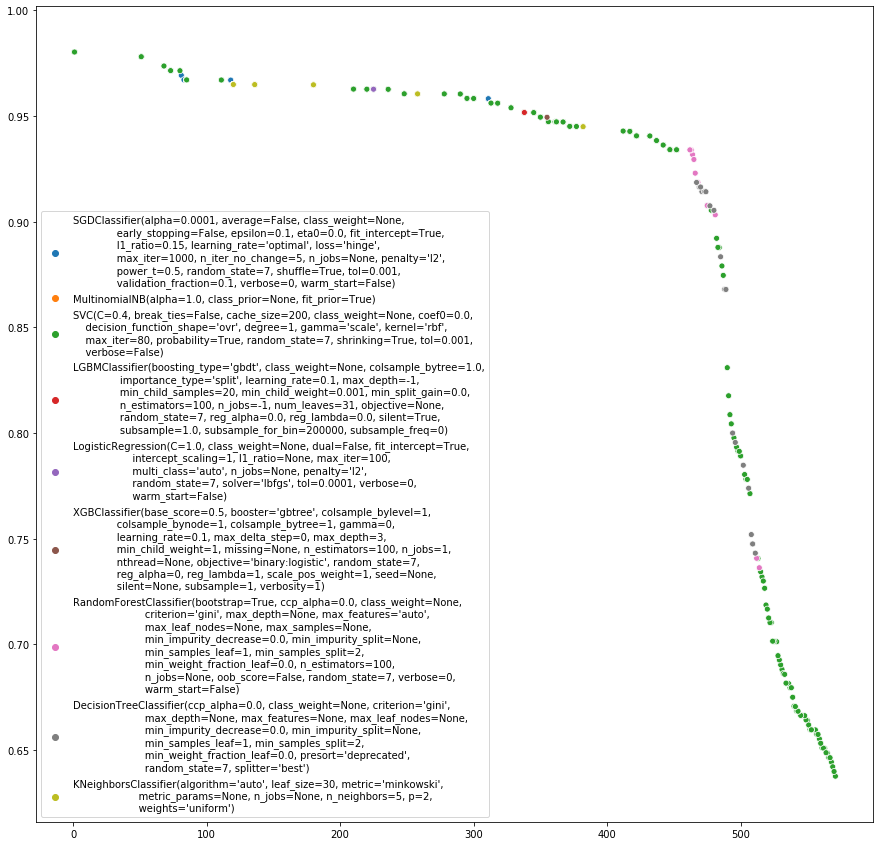

In [21]:
plt.figure(figsize = (15,15))
sns.scatterplot(x=gscv.cv_results_['rank_test_score'], y=gscv.cv_results_['mean_test_score'], hue=gscv.cv_results_['param_clf_switcher__estimator'])